In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# srl-python-indicators
Python version of [srl-ctrader-indicators](https://github.com/srlcarlg/srl-ctrader-indicators)

**The features of each indicator** are now fully synchronized with C# code. <br>
**The additional features** developed here will be added _(perhaps improved!)_ to C# version soon, at the proper time.

Currently, all indicators are plotted with 'plotly' library, but:
- *multi_vwap* can be plotted with mplfinance
- *tpo_profile/volume_profile* have limited support to plot with mplfinance (ex: no levels)
- *weis_wyckoff_system* no longer uses mplfinance.

See ‘notebooks’ folder for a detailed review of each indicator.

In [2]:
import pandas as pd

df_ticks = pd.read_parquet(f"data/US30_T1_2025_cT.parquet")
df_ticks.rename(columns={'bid': 'close'}, inplace=True)
df_ticks.head(3)
len(df_ticks)

df_ohlcv = pd.read_parquet(f"data/US30_1Minute_2025_cT.parquet")
df_ohlcv.head(3)
len(df_ohlcv)

from rangedf import Range
r = Range(df_ticks, range_size=14)
df_range = r.range_df()

render = 'png'

,ask,close,spread
datetime,,,
2025-05-15 00:00:00.650,41839.4,41838.3,1.1
2025-05-15 00:00:01.002,41839.8,41838.7,1.1
2025-05-15 00:00:01.252,41840.2,41839.1,1.1


180399

,open,high,low,close,volume
datetime,,,,,
2025-05-15 00:00:00,41838.7,41846.1,41833.8,41846.1,142.0
2025-05-15 00:01:00,41845.1,41853.3,41843.8,41852.1,90.0
2025-05-15 00:02:00,41853.5,41858.6,41853.5,41855.1,96.0


2631

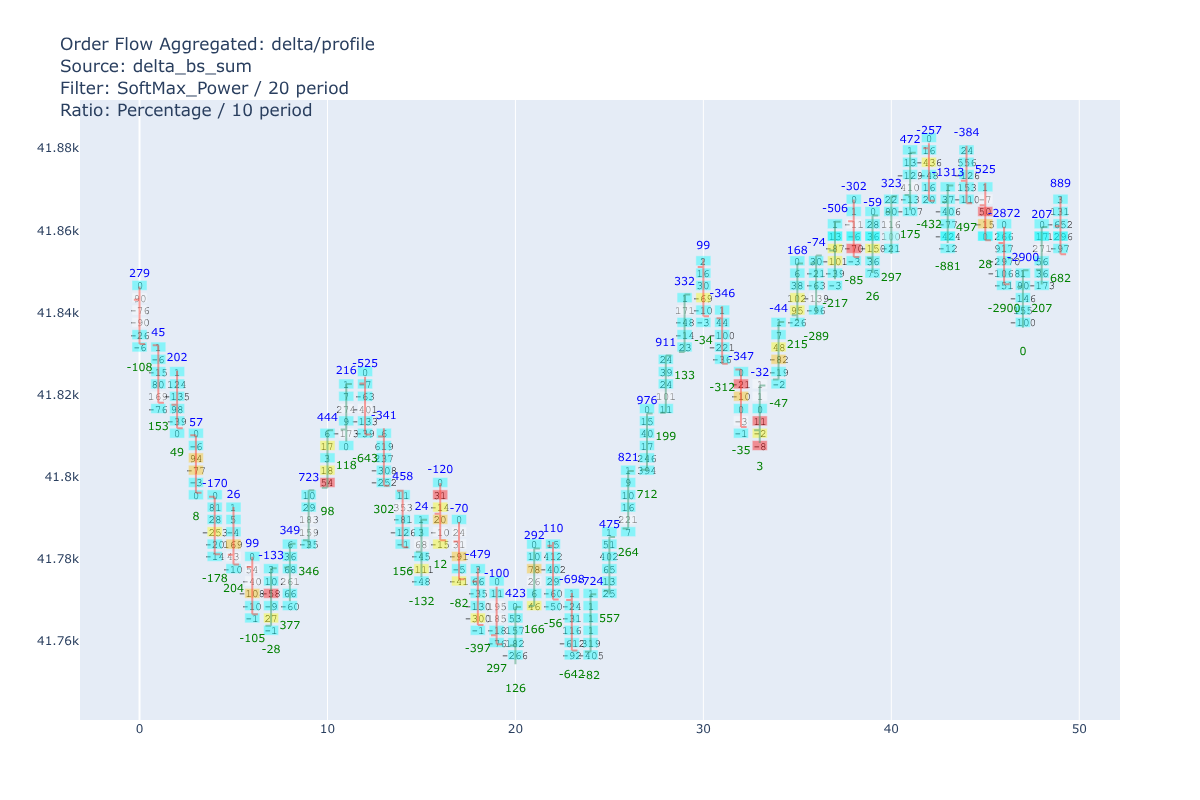

In [3]:
from order_flow_aggregated import OrderFlowAggregated, SpikePlot
odft = OrderFlowAggregated(df_range, df_ticks, 3, is_open_time=False)

plot_params = SpikePlot(spike_chart=True, spike_levels=False)
odft.plot([50, 100], mode='delta', chart='ohlc', spike_plot=plot_params, renderer=render)

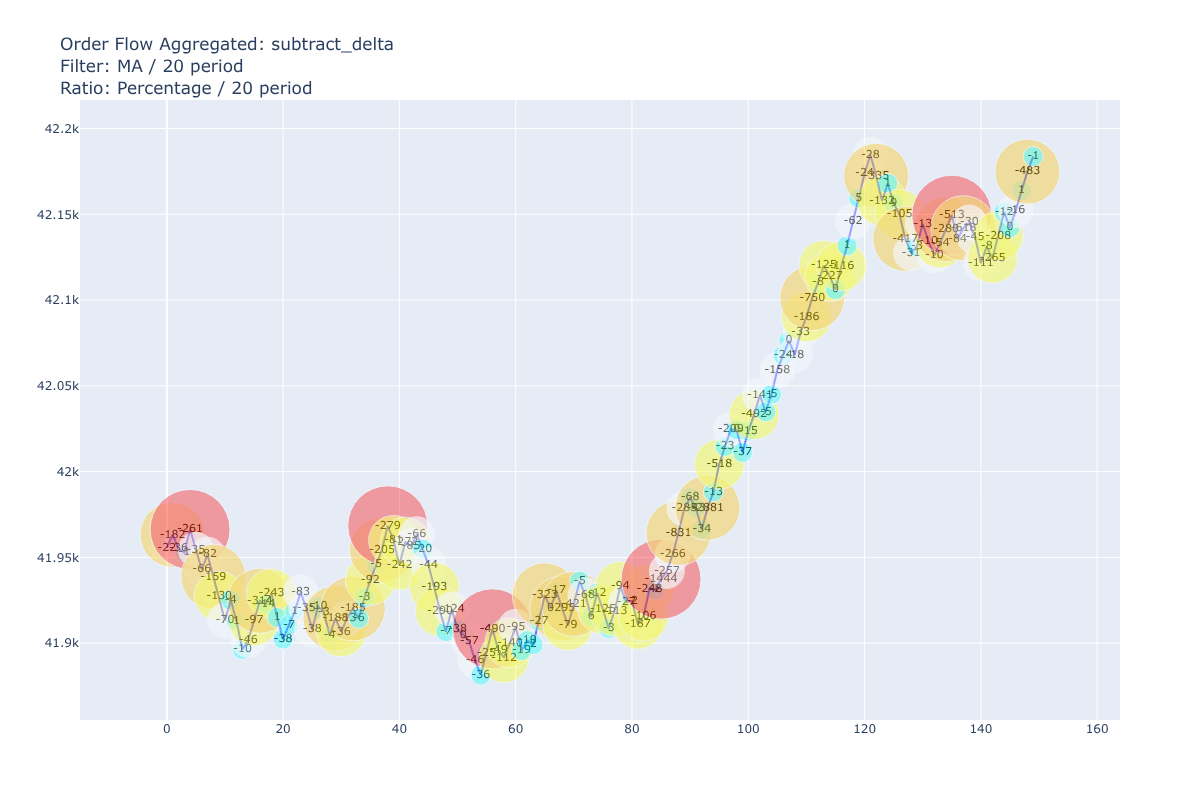

In [4]:
odft.plot_bubbles([350, 500], 'subtract', 'heatmap', renderer=render)

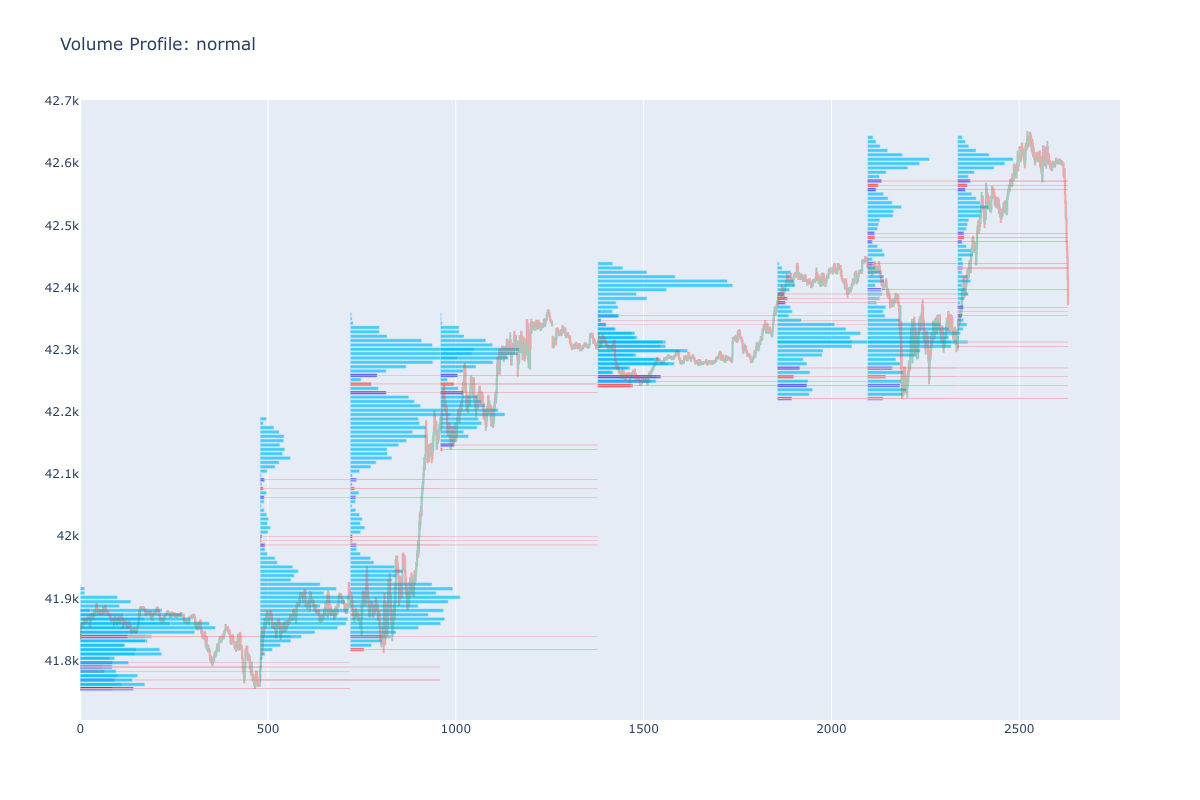

In [5]:
from volume_profile import VolumeProfile, DistributionData, ExtraProfile

vp = VolumeProfile(df_ohlcv, None, 7, pd.Timedelta(hours=12), DistributionData.OHLC_No_Avg)
vp.plot_ly('normal', nodes_source='lvn',
          extra_profile=ExtraProfile.Mini, mini_interval=pd.Timedelta(hours=8),
          renderer=render)

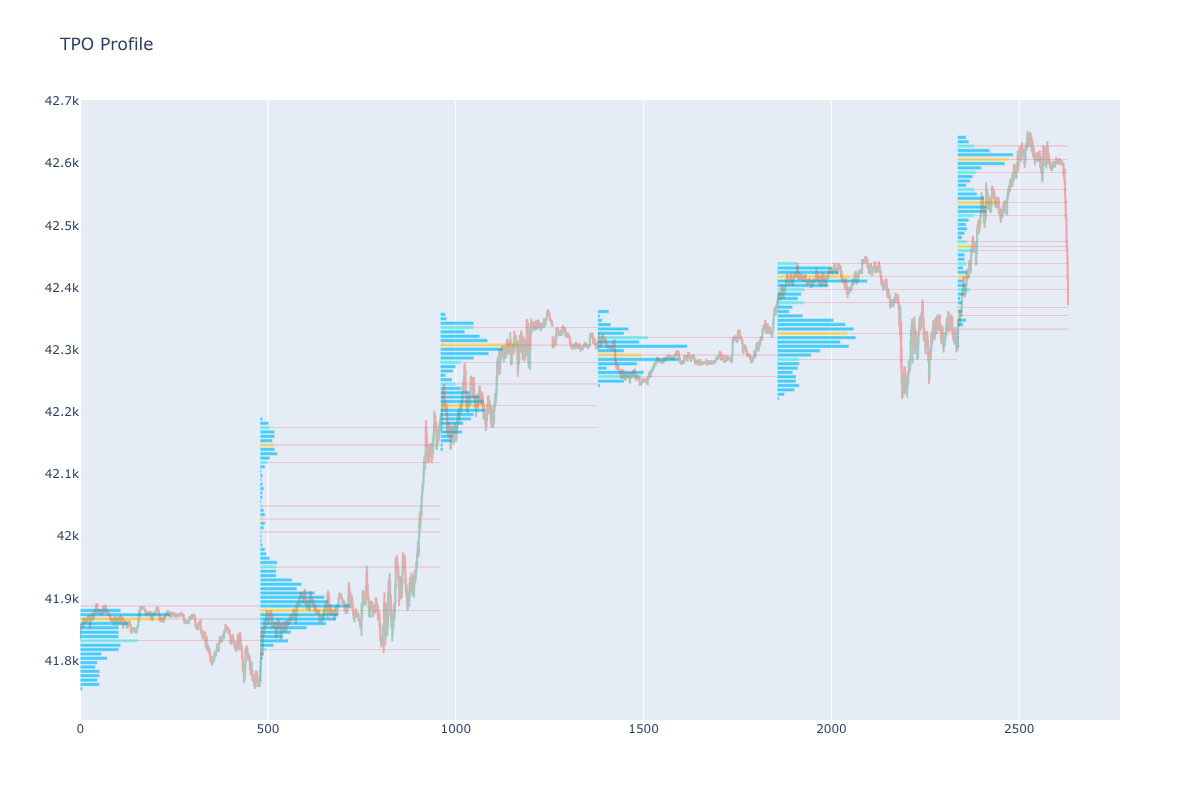

In [6]:
from tpo_profile import TpoProfile

tpo = TpoProfile(df_ohlcv, 7, pd.Timedelta(hours=8))
tpo.plot_ly(nodes_source='hvn', renderer=render)

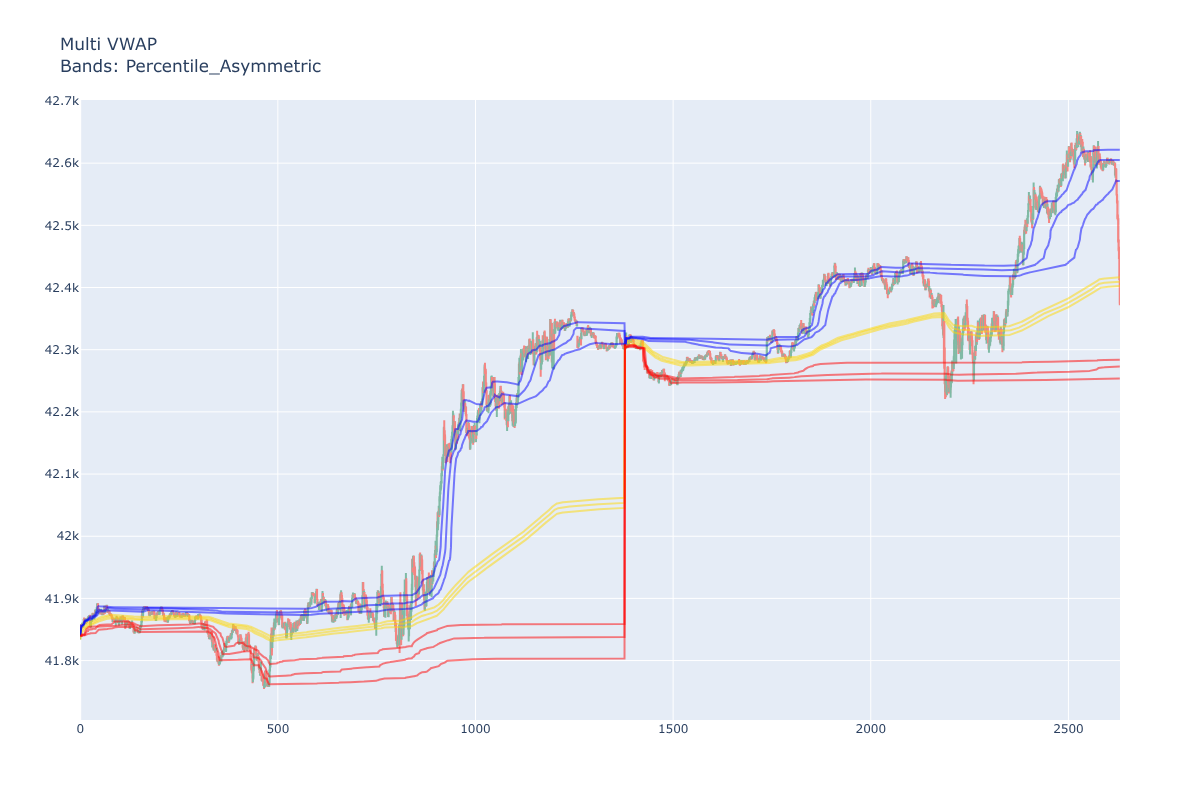

In [7]:
from multi_vwap import MultiVwap, BandsFilter, BandsType

vwap = MultiVwap(df_ohlcv)
filter = BandsFilter(BandsType.Percentile_Asymmetric, volume_weighted=False)
vwap.plot_ly(bands_at='daily', bands_filter=filter, renderer=render)

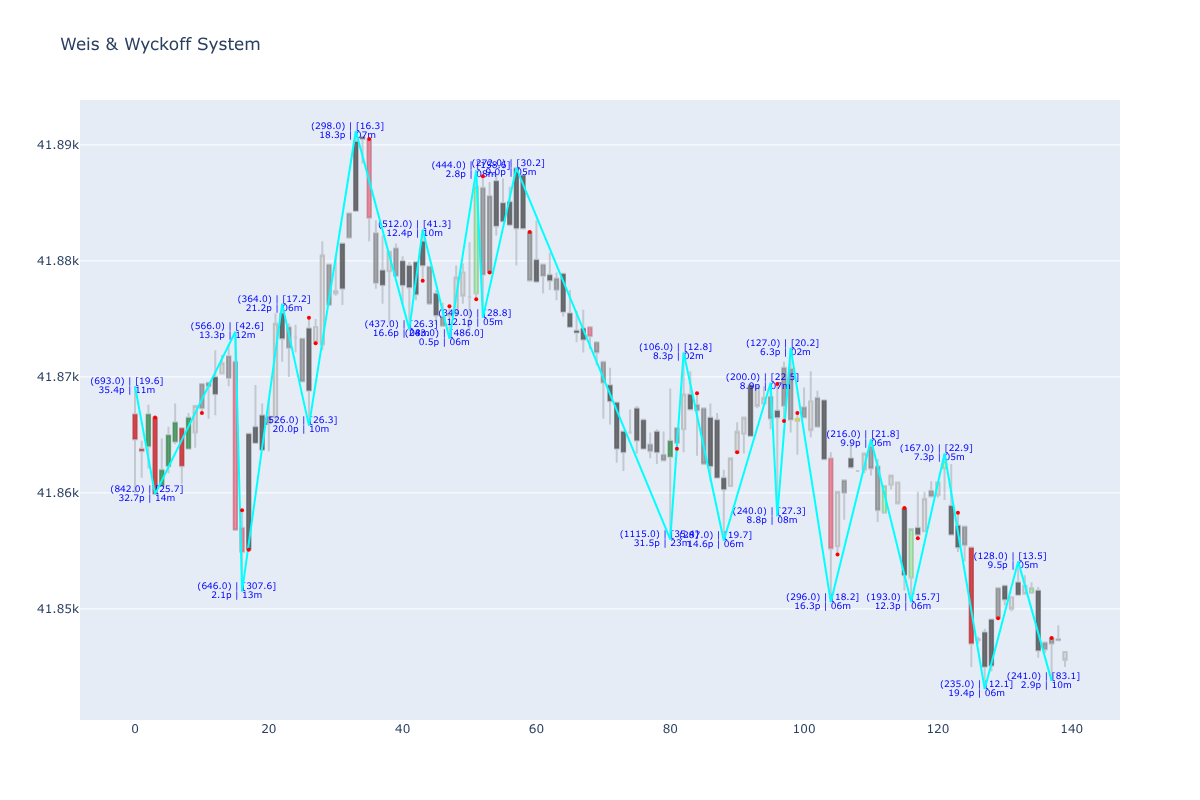

In [8]:
from weis_wyckoff_system import WeisWyckoffSystem
from models_utils.ww_models import ZigZagInit, ZigZagMode, PriorityMode

ww = WeisWyckoffSystem()
_zz = ZigZagInit(ZigZagMode.Percentage, pct_value=0.02)
df = ww.full_analysis(df_ohlcv, None, None, zigzag_init=_zz)
df = df.iloc[10:150]
ww.plot(df, bar_time=False, bar_volume=False, turning_point=True, renderer=render)